In [162]:
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
# plt.rcParams["image.cmap"] = "tab10"
plt.rcParams["image.cmap"] = "Dark2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
fs_label = 15
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

from matplotlib.colors import LinearSegmentedColormap


import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
    
    
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"

path_figs = os.getcwd() +"\\..\\Figures\\" 

saveFigures is set to: True
Done loading packages


In [163]:

latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdate = latestsubdir[-10:]
latestdir = path_dash + latestsubdir
latestdir

# dfAge = pd.read_csv(latestdir+'\\Regionalt_DB\\18_fnkt_alder_uge_testede_positive_nyindlagte.csv',delimiter=';',encoding='latin1')

dfCurAdmitted = pd.read_csv(latestdir+'\\Gennembruds_DB\\01_indlagte_pr_vaccinationsstatus.csv',delimiter=';',encoding='latin1')
df = pd.read_csv(latestdir+'\\Gennembruds_DB\\06_nyindlagte_pr_vaccinationsstatus_pr_aldersgrp_pr_uge.csv',delimiter=';',encoding='latin1')

df['Nyindlagte pr. 100.000'] = pd.to_numeric(df['Nyindlagte pr. 100.000'].str.replace(',','.'))
dfCurAdmitted

,Vaccinationsstatus,Antal indlagte,Befolkningstørrelse,Indlagte pr. 100.000
0,Forventet fuld effekt,282,4446042,"6,34"
1,Ikke vaccineret,155,545872,"28,39"
2,Påbegyndt vaccinationsforløb,15,139774,"10,73"


# Plot the latest week

In [164]:
# df
df_latestWeek = df[df.Uge == df.iloc[-1,0]]
df_latestWeek

,Uge,Aldersgruppe,Vaccinationsstatus,Antal nyindlagte,Befolkningstørrelse,Nyindlagte pr. 100.000
822,2021-W48,12-15,Forventet fuld effekt,1,201556,0.50
823,2021-W48,12-15,Ikke vaccineret,3,66663,4.50
824,2021-W48,12-15,Påbegyndt vaccinationsforløb,1,26425,3.78
825,2021-W48,16-19,Forventet fuld effekt,2,236091,0.85
826,2021-W48,16-19,Ikke vaccineret,5,33582,14.89
827,2021-W48,16-19,Påbegyndt vaccinationsforløb,0,9635,0.00
828,2021-W48,20-39,Forventet fuld effekt,23,1144254,2.01
829,2021-W48,20-39,Ikke vaccineret,75,280534,26.73
830,2021-W48,20-39,Påbegyndt vaccinationsforløb,9,68665,13.11
831,2021-W48,40-64,Forventet fuld effekt,88,1736532,5.07


In [165]:
curdf = df_latestWeek.copy()
dfVacc = curdf[curdf.Vaccinationsstatus == 'Forventet fuld effekt']
dfUnva = curdf[curdf.Vaccinationsstatus == 'Ikke vaccineret']
display(dfVacc)

# 100000*dfVacc['Antal nyindlagte']/dfVacc['Befolkningstørrelse']



,Uge,Aldersgruppe,Vaccinationsstatus,Antal nyindlagte,Befolkningstørrelse,Nyindlagte pr. 100.000
822,2021-W48,12-15,Forventet fuld effekt,1,201556,0.50
825,2021-W48,16-19,Forventet fuld effekt,2,236091,0.85
828,2021-W48,20-39,Forventet fuld effekt,23,1144254,2.01
831,2021-W48,40-64,Forventet fuld effekt,88,1736532,5.07
834,2021-W48,65-79,Forventet fuld effekt,123,860532,14.29
837,2021-W48,80+,Forventet fuld effekt,73,255948,28.52


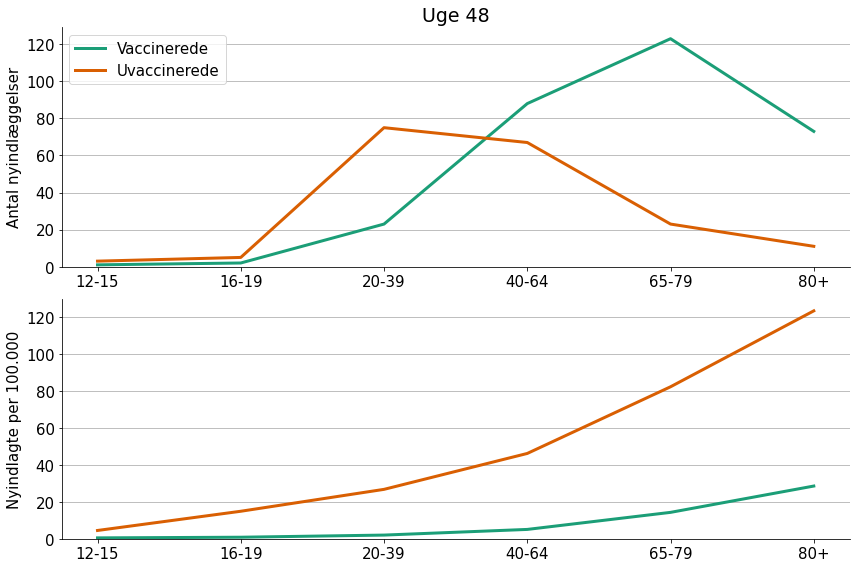

In [166]:
fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(dfVacc.Aldersgruppe,dfVacc['Antal nyindlagte'],label='Vaccinerede')
ax1.plot(dfUnva.Aldersgruppe,dfUnva['Antal nyindlagte'],label='Uvaccinerede')

ax2.plot(dfVacc.Aldersgruppe,dfVacc['Nyindlagte pr. 100.000'],label='Vaccinerede')
ax2.plot(dfUnva.Aldersgruppe,dfUnva['Nyindlagte pr. 100.000'],label='Uvaccinerede')

weekNum = df.iloc[-1,0][-2:]
ax1.set_title(f'Uge {weekNum}')
ax1.set_ylabel('Antal nyindlæggelser')
ax2.set_ylabel('Nyindlagte per 100.000')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

ax1.grid(axis='y')
ax2.grid(axis='y')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+f'Breakthrough/CountAndIncidence_Admissions_DA_{weekNum}')

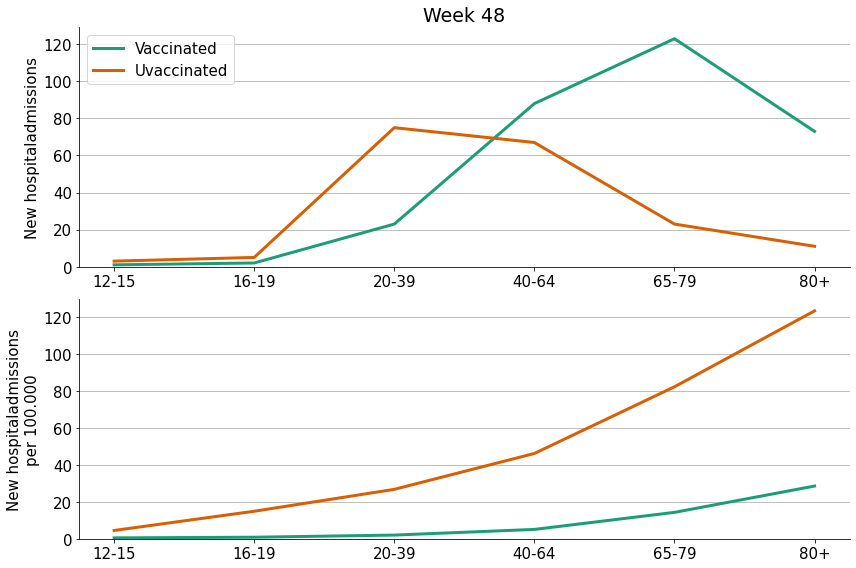

In [167]:
fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(dfVacc.Aldersgruppe,dfVacc['Antal nyindlagte'],label='Vaccinated')
ax1.plot(dfUnva.Aldersgruppe,dfUnva['Antal nyindlagte'],label='Uvaccinated')

ax2.plot(dfVacc.Aldersgruppe,dfVacc['Nyindlagte pr. 100.000'],label='Vaccinated')
ax2.plot(dfUnva.Aldersgruppe,dfUnva['Nyindlagte pr. 100.000'],label='Uvaccinated')

weekNum = df.iloc[-1,0][-2:]
ax1.set_title(f'Week {weekNum}')
ax1.set_ylabel('New hospitaladmissions')
ax2.set_ylabel('New hospitaladmissions\nper 100.000')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

ax1.grid(axis='y')
ax2.grid(axis='y')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+f'Breakthrough/CountAndIncidence_Admissions_EN_{weekNum}')

# Summary of multiple weeks 

In [168]:
numWeeksToUse = 4
allPosWeeks = df.Uge.unique()


weekstoUse = allPosWeeks[-numWeeksToUse:]

curdf = df[df.Uge.isin(weekstoUse)]
# curdf.groupby('Aldersgruppe').sum()
dfVacc = curdf[curdf.Vaccinationsstatus == 'Forventet fuld effekt']
dfUnva = curdf[curdf.Vaccinationsstatus == 'Ikke vaccineret']

display(dfVacc.groupby('Aldersgruppe').sum())
display(dfUnva.groupby('Aldersgruppe').sum())

sumVacc = dfVacc.groupby('Aldersgruppe').sum()
sumUnva = dfUnva.groupby('Aldersgruppe').sum()

,Antal nyindlagte,Befolkningstørrelse,Nyindlagte pr. 100.000
Aldersgruppe,,,
12-15,2,792785,1.00
16-19,8,940510,3.40
20-39,90,4544398,7.91
40-64,280,6936170,16.15
65-79,427,3443279,49.60
80+,289,1026785,112.59


,Antal nyindlagte,Befolkningstørrelse,Nyindlagte pr. 100.000
Aldersgruppe,,,
12-15,9,288395,12.64
16-19,10,143493,28.45
20-39,259,1183358,88.23
40-64,255,601718,170.22
65-79,85,114247,298.38
80+,43,36381,473.99


In [169]:
# 100000*sumVacc['Nyindlagte pr. 100.000']/sumVacc['Befolkningstørrelse']
# 100000*sumUnva['Nyindlagte pr. 100.000']/sumUnva['Befolkningstørrelse']

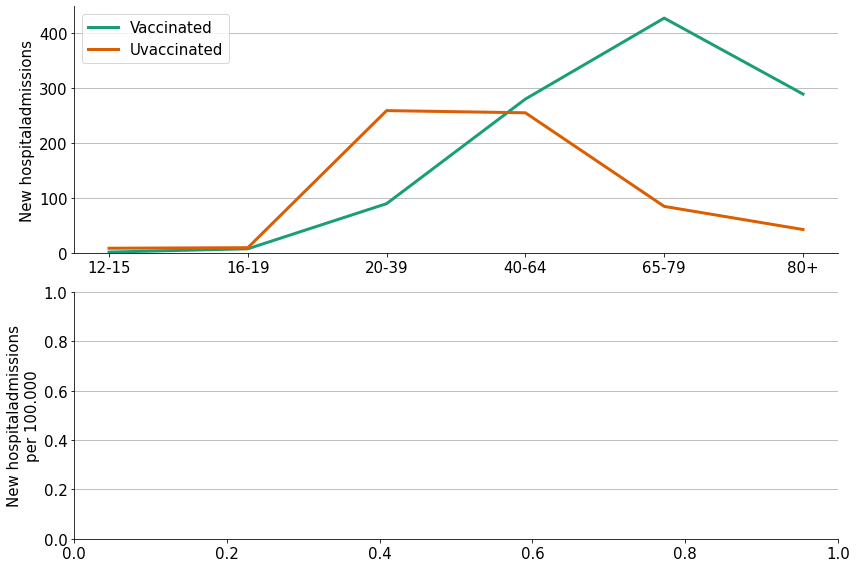

In [170]:
fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(sumVacc.index,sumVacc['Antal nyindlagte'],label='Vaccinated')
ax1.plot(sumUnva.index,sumUnva['Antal nyindlagte'],label='Uvaccinated')

# ax2.plot(dfVacc.Aldersgruppe,dfVacc['Nyindlagte pr. 100.000'],label='Vaccinated')
# ax2.plot(dfUnva.Aldersgruppe,dfUnva['Nyindlagte pr. 100.000'],label='Uvaccinated')

weekNum = df.iloc[-1,0][-2:]
# ax1.set_title(f'Week {weekNum}')
ax1.set_ylabel('New hospitaladmissions')
ax2.set_ylabel('New hospitaladmissions\nper 100.000')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

ax1.grid(axis='y')
ax2.grid(axis='y')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()

# if saveFigures:
#     plt.savefig(path_figs+f'Breakthrough/CountAndIncidence_Admissions_EN_{weekNum}')

# Use the data with extra detail

In [171]:
# Define datapath and load
ssidatapath = "ssi_data"
rootdir = os.getcwd() +"\\" + ssidatapath


# Data is (only) in the file from the most recent tuesday. 
# Should be made smarter, but here hardcoded
tuePath = 'overvaagningsdata-covid19-14092021-jrhb'
tuePath = 'SSI_data_2021-12-07'

# dirPath = rootdir + '\\' + tuePath + '\\'
dirPath = path_data  + tuePath + '\\'
df1 = pd.read_csv(dirPath+'gennembrudsinfektioner_table1.csv',delimiter=';')
df2_C = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_cases.csv',delimiter=';')
df2_H = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_indlagte.csv',delimiter=';')
df2_R = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_antal_repositive.csv',delimiter=';')
df3 = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_alle.csv',delimiter=';')
df3_C = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_cases.csv',delimiter=';')
df3_H = pd.read_csv(dirPath+'gennembrudsinfektioner_table2_incidence_indlagte.csv',delimiter=';')

In [172]:
# df2_H

# df3_H 
latestWeek = df2_H.columns[1][:11]
# # countVacc = df2_H
countUnva = df2_H[latestWeek+'_Ingen vaccination']
countVacc = df2_H[latestWeek+'_Fuld effekt efter primært forløb']
inciUnva = pd.to_numeric(df3_H[latestWeek+'_Ingen vaccination'].str.replace(',','.'))
inciVacc = pd.to_numeric(df3_H[latestWeek+'_Fuld effekt efter primært forløb'].str.replace(',','.'))

ageGroups = df2_H.Aldersgruppe

In [173]:
# Cutout the sums at the end
ageGroups = ageGroups.values[:-2]
countUnva = countUnva.values[:-2]
countVacc = countVacc.values[:-2]
inciUnva = inciUnva.values[:-2]
inciVacc = inciVacc.values[:-2]

In [174]:
# Combine 60-64 and 65-69
firstPos =np.where(ageGroups == '60-64')[0][0]
# ageGroups[firstPos:firstPos+2]

ageGroups6 = np.hstack([ageGroups[:firstPos],'60-69',ageGroups[firstPos+2:]])
# display(pd.DataFrame(countUnva)

plotdf = pd.DataFrame()
plotdf['Age'] = ageGroups
plotdf['CountUnva'] = countUnva
plotdf['CountVacc'] = countVacc
plotdf['InciUnva'] = inciUnva
plotdf['InciVacc'] = inciVacc
display(plotdf)
C_U_60 = countUnva[firstPos] + countUnva[firstPos+1]
C_V_60 = countVacc[firstPos] + countVacc[firstPos+1]
countUnva6 = np.hstack([countUnva[:firstPos],C_U_60,countUnva[firstPos+2:]])
countVacc6 = np.hstack([countVacc[:firstPos],C_V_60,countVacc[firstPos+2:]])

# Estimate population sizes and use for incidences
popUnva = 100000 * plotdf['CountUnva'] / plotdf['InciUnva']
popVacc = 100000 * plotdf['CountVacc'] / plotdf['InciVacc']
totPop60Vacc = popVacc[firstPos] + popVacc[firstPos+1]
totPop60Unva = popUnva[firstPos] + popUnva[firstPos+1]
I_U_60 = 100000 * C_U_60/totPop60Unva
I_V_60 = 100000 * C_V_60/totPop60Vacc
inciUnva6 = np.hstack([inciUnva[:firstPos],I_U_60,inciUnva[firstPos+2:]])
inciVacc6 = np.hstack([inciVacc[:firstPos],I_V_60,inciVacc[firstPos+2:]])

countVacc6
inciUnva6

,Age,CountUnva,CountVacc,InciUnva,InciVacc
0,0-5,21,0,5.5,0.0
1,6-11,10,0,3.1,0.0
2,12-15,4,1,7.7,0.5
3,16-19,5,3,18.0,1.4
4,20-29,32,13,24.0,2.5
5,30-39,43,10,38.1,2.1
6,40-49,33,24,49.4,4.2
7,50-59,24,35,49.8,5.5
8,60-64,10,30,64.9,10.7
9,65-69,10,21,88.5,8.0


array([  5.5       ,   3.1       ,   7.7       ,  18.        ,
        24.        ,  38.1       ,  49.4       ,  49.8       ,
        74.88461538,  97.6       , 142.2       ])

In [175]:
inciUnva[firstPos+2:]
inciUnva

array([  5.5,   3.1,   7.7,  18. ,  24. ,  38.1,  49.4,  49.8,  64.9,
        88.5,  97.6, 142.2])

In [176]:
# # 100000 * 97.6 / 15
# popUnva = 100000 * plotdf['CountUnva'] / plotdf['InciUnva']
# popVacc = 100000 * plotdf['CountVacc'] / plotdf['InciVacc']
# totPop60Vacc = popVacc[firstPos] + popVacc[firstPos+1]
# totPop60Unva = popUnva[firstPos] + popUnva[firstPos+1]

# I_U_60 = 100000 * C_U_60/totPop60Unva
# I_V_60 = 100000 * C_V_60/totPop60Vacc

# print(I_U_60)
# print(I_V_60)

plotdf6 = pd.DataFrame()
plotdf6['Age'] = ageGroups6
plotdf6['CountUnva'] = countUnva6
plotdf6['CountVacc'] = countVacc6
plotdf6['InciUnva'] = inciUnva6
plotdf6['InciVacc'] = inciVacc6
display(plotdf6)
display(plotdf)

,Age,CountUnva,CountVacc,InciUnva,InciVacc
0,0-5,21,0,5.500000,0.000000
1,6-11,10,0,3.100000,0.000000
2,12-15,4,1,7.700000,0.500000
3,16-19,5,3,18.000000,1.400000
4,20-29,32,13,24.000000,2.500000
5,30-39,43,10,38.100000,2.100000
6,40-49,33,24,49.400000,4.200000
7,50-59,24,35,49.800000,5.500000
8,60-69,20,51,74.884615,9.394448
9,70-79,15,104,97.600000,22.300000


,Age,CountUnva,CountVacc,InciUnva,InciVacc
0,0-5,21,0,5.5,0.0
1,6-11,10,0,3.1,0.0
2,12-15,4,1,7.7,0.5
3,16-19,5,3,18.0,1.4
4,20-29,32,13,24.0,2.5
5,30-39,43,10,38.1,2.1
6,40-49,33,24,49.4,4.2
7,50-59,24,35,49.8,5.5
8,60-64,10,30,64.9,10.7
9,65-69,10,21,88.5,8.0


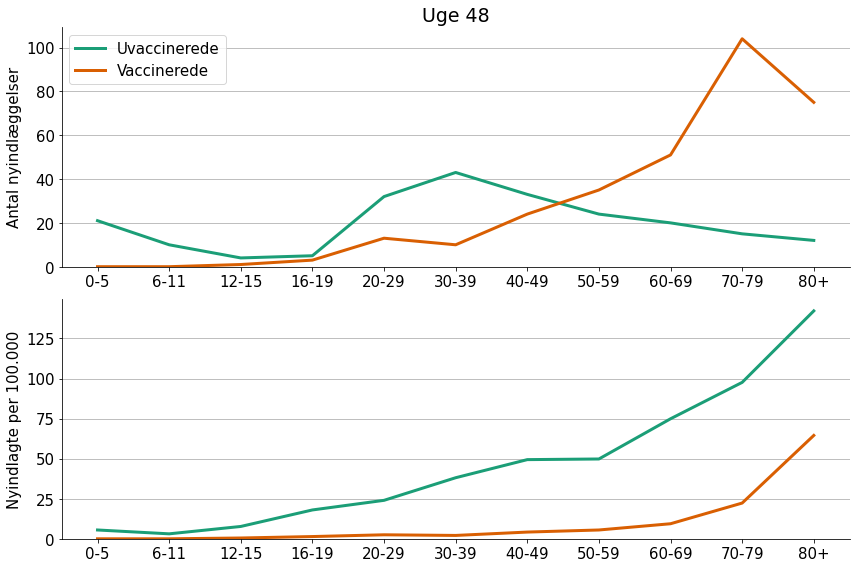

In [177]:
fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(ageGroups6,countUnva6,label='Uvaccinerede')
ax1.plot(ageGroups6,countVacc6,label='Vaccinerede')
ax2.plot(ageGroups6,inciUnva6,label='Uvaccinerede')
ax2.plot(ageGroups6,inciVacc6,label='Vaccinerede')
# ax1.plot(dfVacc.Aldersgruppe,dfVacc['Antal nyindlagte'],label='Vaccinerede')
# ax1.plot(dfUnva.Aldersgruppe,dfUnva['Antal nyindlagte'],label='Uvaccinerede')

# ax2.plot(dfVacc.Aldersgruppe,dfVacc['Nyindlagte pr. 100.000'],label='Vaccinerede')
# ax2.plot(dfUnva.Aldersgruppe,dfUnva['Nyindlagte pr. 100.000'],label='Uvaccinerede')

weekNum = df.iloc[-1,0][-2:]
ax1.set_title(f'Uge {weekNum}')
ax1.set_ylabel('Antal nyindlæggelser')
ax2.set_ylabel('Nyindlagte per 100.000')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

ax1.grid(axis='y')
ax2.grid(axis='y')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+f'Breakthrough/CountAndIncidence_Admissions_ManyAgeGroups_60combined_DA_{weekNum}')

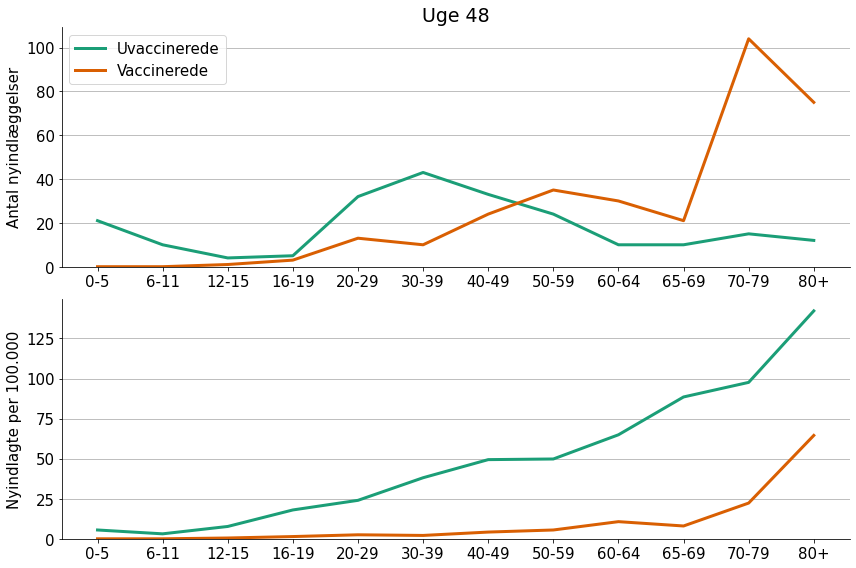

In [178]:
fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(ageGroups,countUnva,label='Uvaccinerede')
ax1.plot(ageGroups,countVacc,label='Vaccinerede')
ax2.plot(ageGroups,inciUnva,label='Uvaccinerede')
ax2.plot(ageGroups,inciVacc,label='Vaccinerede')
# ax1.plot(dfVacc.Aldersgruppe,dfVacc['Antal nyindlagte'],label='Vaccinerede')
# ax1.plot(dfUnva.Aldersgruppe,dfUnva['Antal nyindlagte'],label='Uvaccinerede')

# ax2.plot(dfVacc.Aldersgruppe,dfVacc['Nyindlagte pr. 100.000'],label='Vaccinerede')
# ax2.plot(dfUnva.Aldersgruppe,dfUnva['Nyindlagte pr. 100.000'],label='Uvaccinerede')

weekNum = df.iloc[-1,0][-2:]
ax1.set_title(f'Uge {weekNum}')
ax1.set_ylabel('Antal nyindlæggelser')
ax2.set_ylabel('Nyindlagte per 100.000')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

ax1.grid(axis='y')
ax2.grid(axis='y')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+f'Breakthrough/CountAndIncidence_Admissions_ManyAgeGroups_DA_{weekNum}')

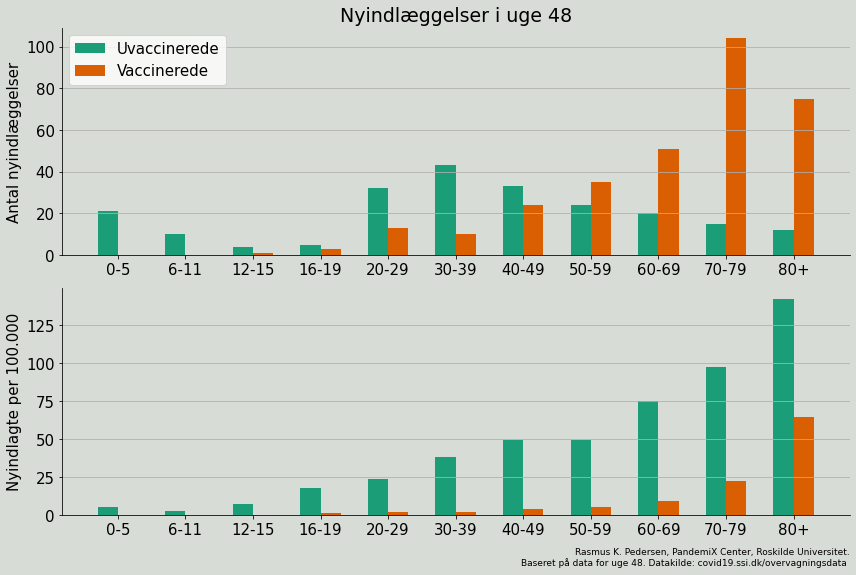

In [444]:
# As bar charts
fig,(ax1,ax2) = plt.subplots(2,1)
curColor = 'xkcd:light gray'
fig.patch.set_facecolor(curColor)
ax1.set_facecolor(curColor)
ax2.set_facecolor(curColor)

curWi = 0.3
xRange = np.arange(len(ageGroups6))
ax1.bar(xRange-curWi/2,countUnva6,label='Uvaccinerede',width=curWi)
ax1.bar(xRange+curWi/2,countVacc6,label='Vaccinerede',width=curWi)
ax2.bar(xRange-curWi/2,inciUnva6,label='Uvaccinerede',width=curWi)
ax2.bar(xRange+curWi/2,inciVacc6,label='Vaccinerede',width=curWi)

ax1.set_xticks(xRange)
ax1.set_xticklabels(ageGroups6)
ax2.set_xticks(xRange)
ax2.set_xticklabels(ageGroups6)

weekNum = df.iloc[-1,0][-2:]
ax1.set_title(f'Nyindlæggelser i uge {weekNum}')
ax1.set_ylabel('Antal nyindlæggelser')
ax2.set_ylabel('Nyindlagte per 100.000')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

ax1.grid(axis='y')
ax2.grid(axis='y')


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

textSource = f'Rasmus K. Pedersen, PandemiX Center, Roskilde Universitet.\nBaseret på data for uge {weekNum}. Datakilde: covid19.ssi.dk/overvagningsdata '
ax2.text(1,-0.23,textSource,ha='right',va='bottom',fontsize=9,transform = ax2.transAxes)


plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+f'Breakthrough/CountAndIncidence_Admissions_ManyAgeGroups_60combined_bar_DA_{weekNum}')

# Make a plot of the vaccinedistribution in recent hospital and in society

In [196]:
plotdf
latestdate

thisPath = path_vacc+'SSI_vacc_'+latestdate+'\\Vaccine_DB\\Vaccinationer_DK_aldgrp_koen.csv'
dfvaccstatus = pd.read_csv(thisPath,encoding='latin1',delimiter=';')
dfvaccstatus

,Aldersgruppe,Køn,Antal første vacc.,Antal færdigvacc.,Antal borgere,Andel første vacc.,Andel færdigvacc.
0,0-9,K,6489,4,297907,2.2,0.0
1,0-9,M,6857,4,314522,2.2,0.0
2,10-19,K,235210,209073,330252,71.2,63.3
3,10-19,M,244778,216723,346692,70.6,62.5
4,20-29,K,314660,300818,383087,82.1,78.5
5,20-29,M,320678,305112,399276,80.3,76.4
6,30-39,K,293984,280983,349606,84.1,80.4
7,30-39,M,294455,282545,363342,81.0,77.8
8,40-49,K,335897,330515,368288,91.2,89.7
9,40-49,M,327564,321678,368767,88.8,87.2


In [236]:
# dfvaccstatus20 = dfvaccstatus[dfvaccstatus.Aldersgruppe == '20-29']
# display(dfvaccstatus20)
# vacc20 = dfvaccstatus20['Antal færdigvacc.'].sum()
# unva20 = dfvaccstatus20['Antal borgere'].sum() - vacc20 
# print(vacc20)
# print(unva20)
# print(dfvaccstatus20['Antal borgere'].sum())
# vacc20/dfvaccstatus20['Antal borgere'].sum()
asdf = dfvaccstatus.groupby('Aldersgruppe').sum()
asdf['PercVacc'] = 100 * asdf['Antal færdigvacc.']/asdf['Antal borgere']
asdf['PercUnva'] = 100 - asdf['PercVacc']
display(asdf)

# vaccperc80 = (238476 + 43565) / (245992 + 45715)
asdf80 =  asdf.iloc[-2:].sum()
asdf80['PercVacc'] = 100 * asdf80['Antal færdigvacc.']/asdf80['Antal borgere']
asdf80['PercUnva'] = 100 - asdf80['PercVacc']
display(asdf80)

,Antal første vacc.,Antal færdigvacc.,Antal borgere,Andel første vacc.,Andel færdigvacc.,PercVacc,PercUnva
Aldersgruppe,,,,,,,
0-9,13346,8,612429,4.4,0.0,0.001306,99.998694
10-19,479988,425796,676944,141.8,125.8,62.899738,37.100262
20-29,635338,605930,782363,162.4,154.9,77.448703,22.551297
30-39,588439,563528,712948,165.1,158.2,79.041950,20.958050
40-49,663461,652193,737055,180.0,176.9,88.486341,11.513659
50-59,753765,747344,805847,187.0,185.5,92.740185,7.259815
60-69,645368,642509,673616,191.6,190.8,95.382087,4.617913
70-79,565187,563912,581007,194.5,194.1,97.057695,2.942305
80-89,239123,238476,245992,194.5,194.0,96.944616,3.055384


Antal første vacc.    282910.000000
Antal færdigvacc.     282041.000000
Antal borgere         291707.000000
Andel første vacc.       386.700000
Andel færdigvacc.        385.200000
PercVacc                  96.686401
PercUnva                   3.313599
dtype: float64

In [215]:
plotdf6['PercUnva'] = 100*plotdf6['CountUnva']/(plotdf6['CountUnva']+plotdf6['CountVacc'])
plotdf6['PercVacc'] = 100*plotdf6['CountVacc']/(plotdf6['CountUnva']+plotdf6['CountVacc'])
plotdf6


,Age,CountUnva,CountVacc,InciUnva,InciVacc,PercUnva,PercVacc
0,0-5,21,0,5.500000,0.000000,100.000000,0.000000
1,6-11,10,0,3.100000,0.000000,100.000000,0.000000
2,12-15,4,1,7.700000,0.500000,80.000000,20.000000
3,16-19,5,3,18.000000,1.400000,62.500000,37.500000
4,20-29,32,13,24.000000,2.500000,71.111111,28.888889
5,30-39,43,10,38.100000,2.100000,81.132075,18.867925
6,40-49,33,24,49.400000,4.200000,57.894737,42.105263
7,50-59,24,35,49.800000,5.500000,40.677966,59.322034
8,60-69,20,51,74.884615,9.394448,28.169014,71.830986
9,70-79,15,104,97.600000,22.300000,12.605042,87.394958


In [468]:
# plotdf.iloc[4]

int(np.round(0.97*20)) 
int(np.round(0.86*20)) 
int(np.round(0.77*20)) 
int(np.round(0.29*20)) 

6

In [421]:
# 20 personer over 80: 1 uvacc
# 20 indlagte over 80: 3 uvacc
samplesize = 20
numUnvaPop80 = int(np.round(0.01 * asdf80['PercUnva'] * samplesize))
numUnvaHosp80 = int(np.round(0.01 * plotdf6['PercUnva'].iloc[-1] * samplesize))
print(f'Ud af {samplesize} personer over 80 er {numUnvaPop80} ikke vaccinerede')
print(f'Ud af {samplesize} nyindlagte over 80 er {numUnvaHosp80} ikke vaccinerede')
# numVaccPop = int(np.round(0.01 * asdf80['PercVacc'] * samplesize))
# print(f'Ud af {samplesize} personer over 80 er {numVaccPop} ikke vaccinerede')


# 20 personer i tyverne: 5 uvacc
# 20 indlagte i tyverne: 14 uvacc
# numUnvaPop = int(np.round(0.01 * asdf['PercUnva'].iloc[4] * samplesize))
samplesize = 20
numUnvaPop = int(np.round(0.01 * asdf[asdf.index == '20-29'].PercUnva.values[0]* samplesize))
numUnvaHosp = int(np.round(0.01 * plotdf6['PercUnva'].iloc[4] * samplesize))
print(f'Ud af {samplesize} personer mellem 20 og 29 er {numUnvaPop} ikke vaccinerede')
print(f'Ud af {samplesize} nyindlagte mellem 20 og 29 er {numUnvaHosp} ikke vaccinerede')

Ud af 20 personer over 80 er 1 ikke vaccinerede
Ud af 20 nyindlagte over 80 er 3 ikke vaccinerede
Ud af 20 personer mellem 20 og 29 er 5 ikke vaccinerede
Ud af 20 nyindlagte mellem 20 og 29 er 14 ikke vaccinerede


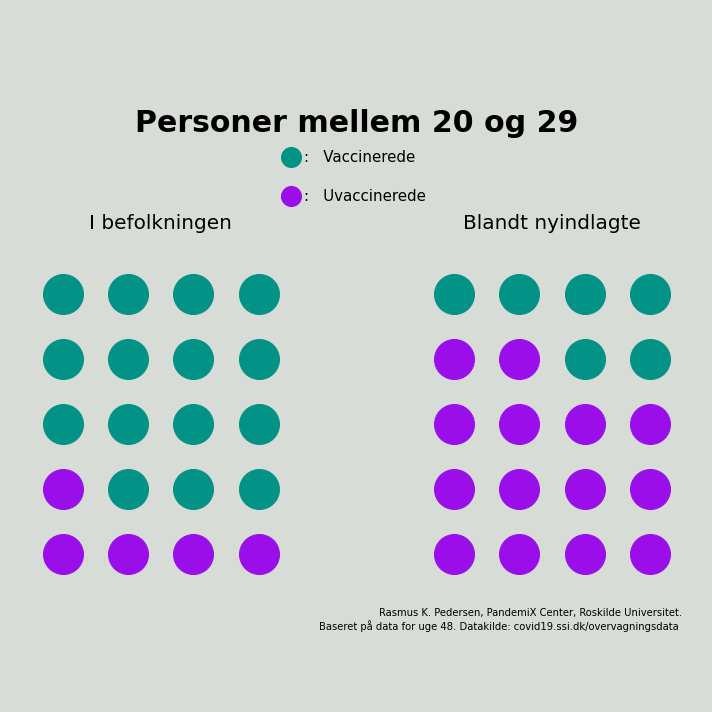

In [454]:
# 20 * asdf['PercUnva'] * 0.01

fig,ax1 = plt.subplots(figsize=(10,10))
curColor = 'xkcd:light gray'
fig.patch.set_facecolor(curColor)
ax1.set_facecolor(curColor)

xdiff = 1
ydiff = xdiff

clrVacc = 'xkcd:teal'
clrUnva = 'xkcd:violet'

for k in range(samplesize):
    xpos = np.mod(k,4)
    ypos = k//4

    if k >= numUnvaPop:
        curColor = clrVacc
    else:
        curColor = clrUnva
    ax1.plot(xpos,ypos,'o',markersize=40,color=curColor)
    
xoffset = 6
for k in range(samplesize):
    xpos = np.mod(k,4)
    ypos = k//4

    if k >= numUnvaHosp:
        curColor = clrVacc
    else:
        curColor = clrUnva
    ax1.plot(xpos+xoffset,ypos,'o',markersize=40,color=curColor)

# ax1.set_xlim([-2,10])
# ax1.axis('equal')
# ax1.set_xlim([-2,11])
# ax1.set_ylim([-1,5])

ax1.text(1.5,5,'I befolkningen',ha='center',fontsize=20)
ax1.text(1.5+xoffset,5,'Blandt nyindlagte',ha='center',fontsize=20)

curMiddle = xoffset-1.5
labelY = 6.5
ax1.text(curMiddle,labelY,'Personer mellem 20 og 29',ha='center',fontsize=30,fontweight='bold')
ax1.plot(curMiddle-1,labelY-0.4,'o',markersize=20,color=clrVacc)
ax1.plot(curMiddle-1,labelY-1.0,'o',markersize=20,color=clrUnva)
ax1.text(curMiddle-0.8,labelY-0.4,':   Vaccinerede',ha='left',va='center',fontsize=15)
ax1.text(curMiddle-0.8,labelY-1.0,':   Uvaccinerede',ha='left',va='center',fontsize=15)

# ax1.text(-0.5,0,'Uvaccinerede:',va='center',ha='right')
textSource = f'Rasmus K. Pedersen, PandemiX Center, Roskilde Universitet.\nBaseret på data for uge {weekNum}. Datakilde: covid19.ssi.dk/overvagningsdata '
ax1.text(9.5,-1,textSource,ha='right',va='center')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax1.set_xticks([])
ax1.set_yticks([])
# ax1.grid()

# ax1.set_ylim([-1,10])
ax1.set_xlim([-2,10])
ax1.axis('equal')
ax1.set_xlim([-1,10])

plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'Breakthrough/VisualAdmissionDistribution_20-29')

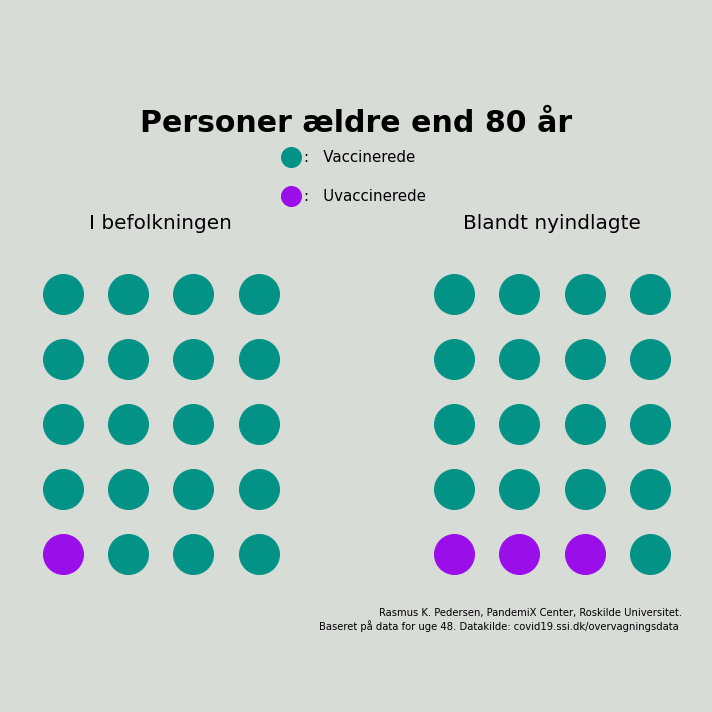

In [457]:
# 20 * asdf['PercUnva'] * 0.01

fig,ax1 = plt.subplots(figsize=(10,10))
curColor = 'xkcd:light gray'
fig.patch.set_facecolor(curColor)
ax1.set_facecolor(curColor)

xdiff = 1
ydiff = xdiff

clrVacc = 'xkcd:teal'
clrUnva = 'xkcd:violet'

for k in range(samplesize):
    xpos = np.mod(k,4)
    ypos = k//4

    if k >= numUnvaPop80:
        curColor = clrVacc
    else:
        curColor = clrUnva
    ax1.plot(xpos,ypos,'o',markersize=40,color=curColor)
    
xoffset = 6
for k in range(samplesize):
    xpos = np.mod(k,4)
    ypos = k//4

    if k >= numUnvaHosp80:
        curColor = clrVacc
    else:
        curColor = clrUnva
    ax1.plot(xpos+xoffset,ypos,'o',markersize=40,color=curColor)

# ax1.set_xlim([-2,10])
# ax1.axis('equal')
# ax1.set_xlim([-2,11])
# ax1.set_ylim([-1,5])

ax1.text(1.5,5,'I befolkningen',ha='center',fontsize=20)
ax1.text(1.5+xoffset,5,'Blandt nyindlagte',ha='center',fontsize=20)

curMiddle = xoffset-1.5
labelY = 6.5
ax1.text(curMiddle,labelY,'Personer ældre end 80 år',ha='center',fontsize=30,fontweight='bold')
ax1.plot(curMiddle-1,labelY-0.4,'o',markersize=20,color=clrVacc)
ax1.plot(curMiddle-1,labelY-1.0,'o',markersize=20,color=clrUnva)
ax1.text(curMiddle-0.8,labelY-0.4,':   Vaccinerede',ha='left',va='center',fontsize=15)
ax1.text(curMiddle-0.8,labelY-1.0,':   Uvaccinerede',ha='left',va='center',fontsize=15)

# ax1.text(-0.5,0,'Uvaccinerede:',va='center',ha='right')
textSource = f'Rasmus K. Pedersen, PandemiX Center, Roskilde Universitet.\nBaseret på data for uge {weekNum}. Datakilde: covid19.ssi.dk/overvagningsdata '
ax1.text(9.5,-1,textSource,ha='right',va='center')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax1.set_xticks([])
ax1.set_yticks([])
# ax1.grid()

# ax1.set_ylim([-1,10])
ax1.set_xlim([-2,10])
ax1.axis('equal')
ax1.set_xlim([-1,10])


plt.tight_layout()

if saveFigures:
    plt.savefig(path_figs+'Breakthrough/VisualAdmissionDistribution_80')